In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         10960 non-null  object 
 1   County                                             10960 non-null  object 
 2   City                                               10960 non-null  object 
 3   State                                              10960 non-null  object 
 4   Postal Code                                        10960 non-null  int64  
 5   Model Year                                         10960 non-null  int64  
 6   Make                                               10960 non-null  object 
 7   Model                                              10960 non-null  object 
 8   Electric Vehicle Type                              10960 non-null  object 
 9   Clean 

   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA        98380        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA        98370        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA        98012        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA        98310        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA        98052        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible 

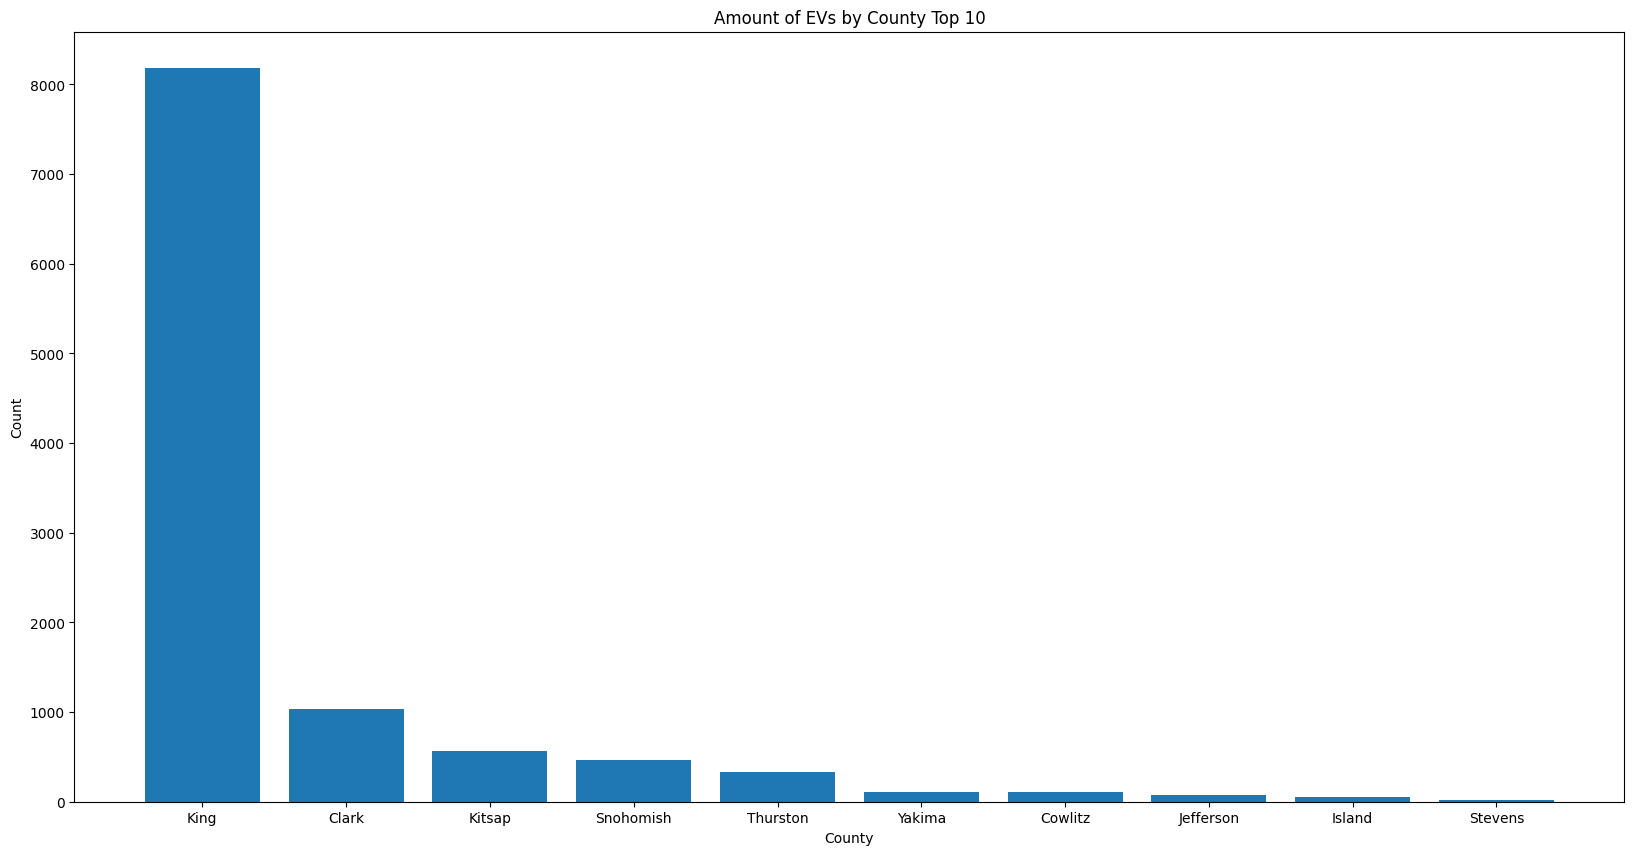

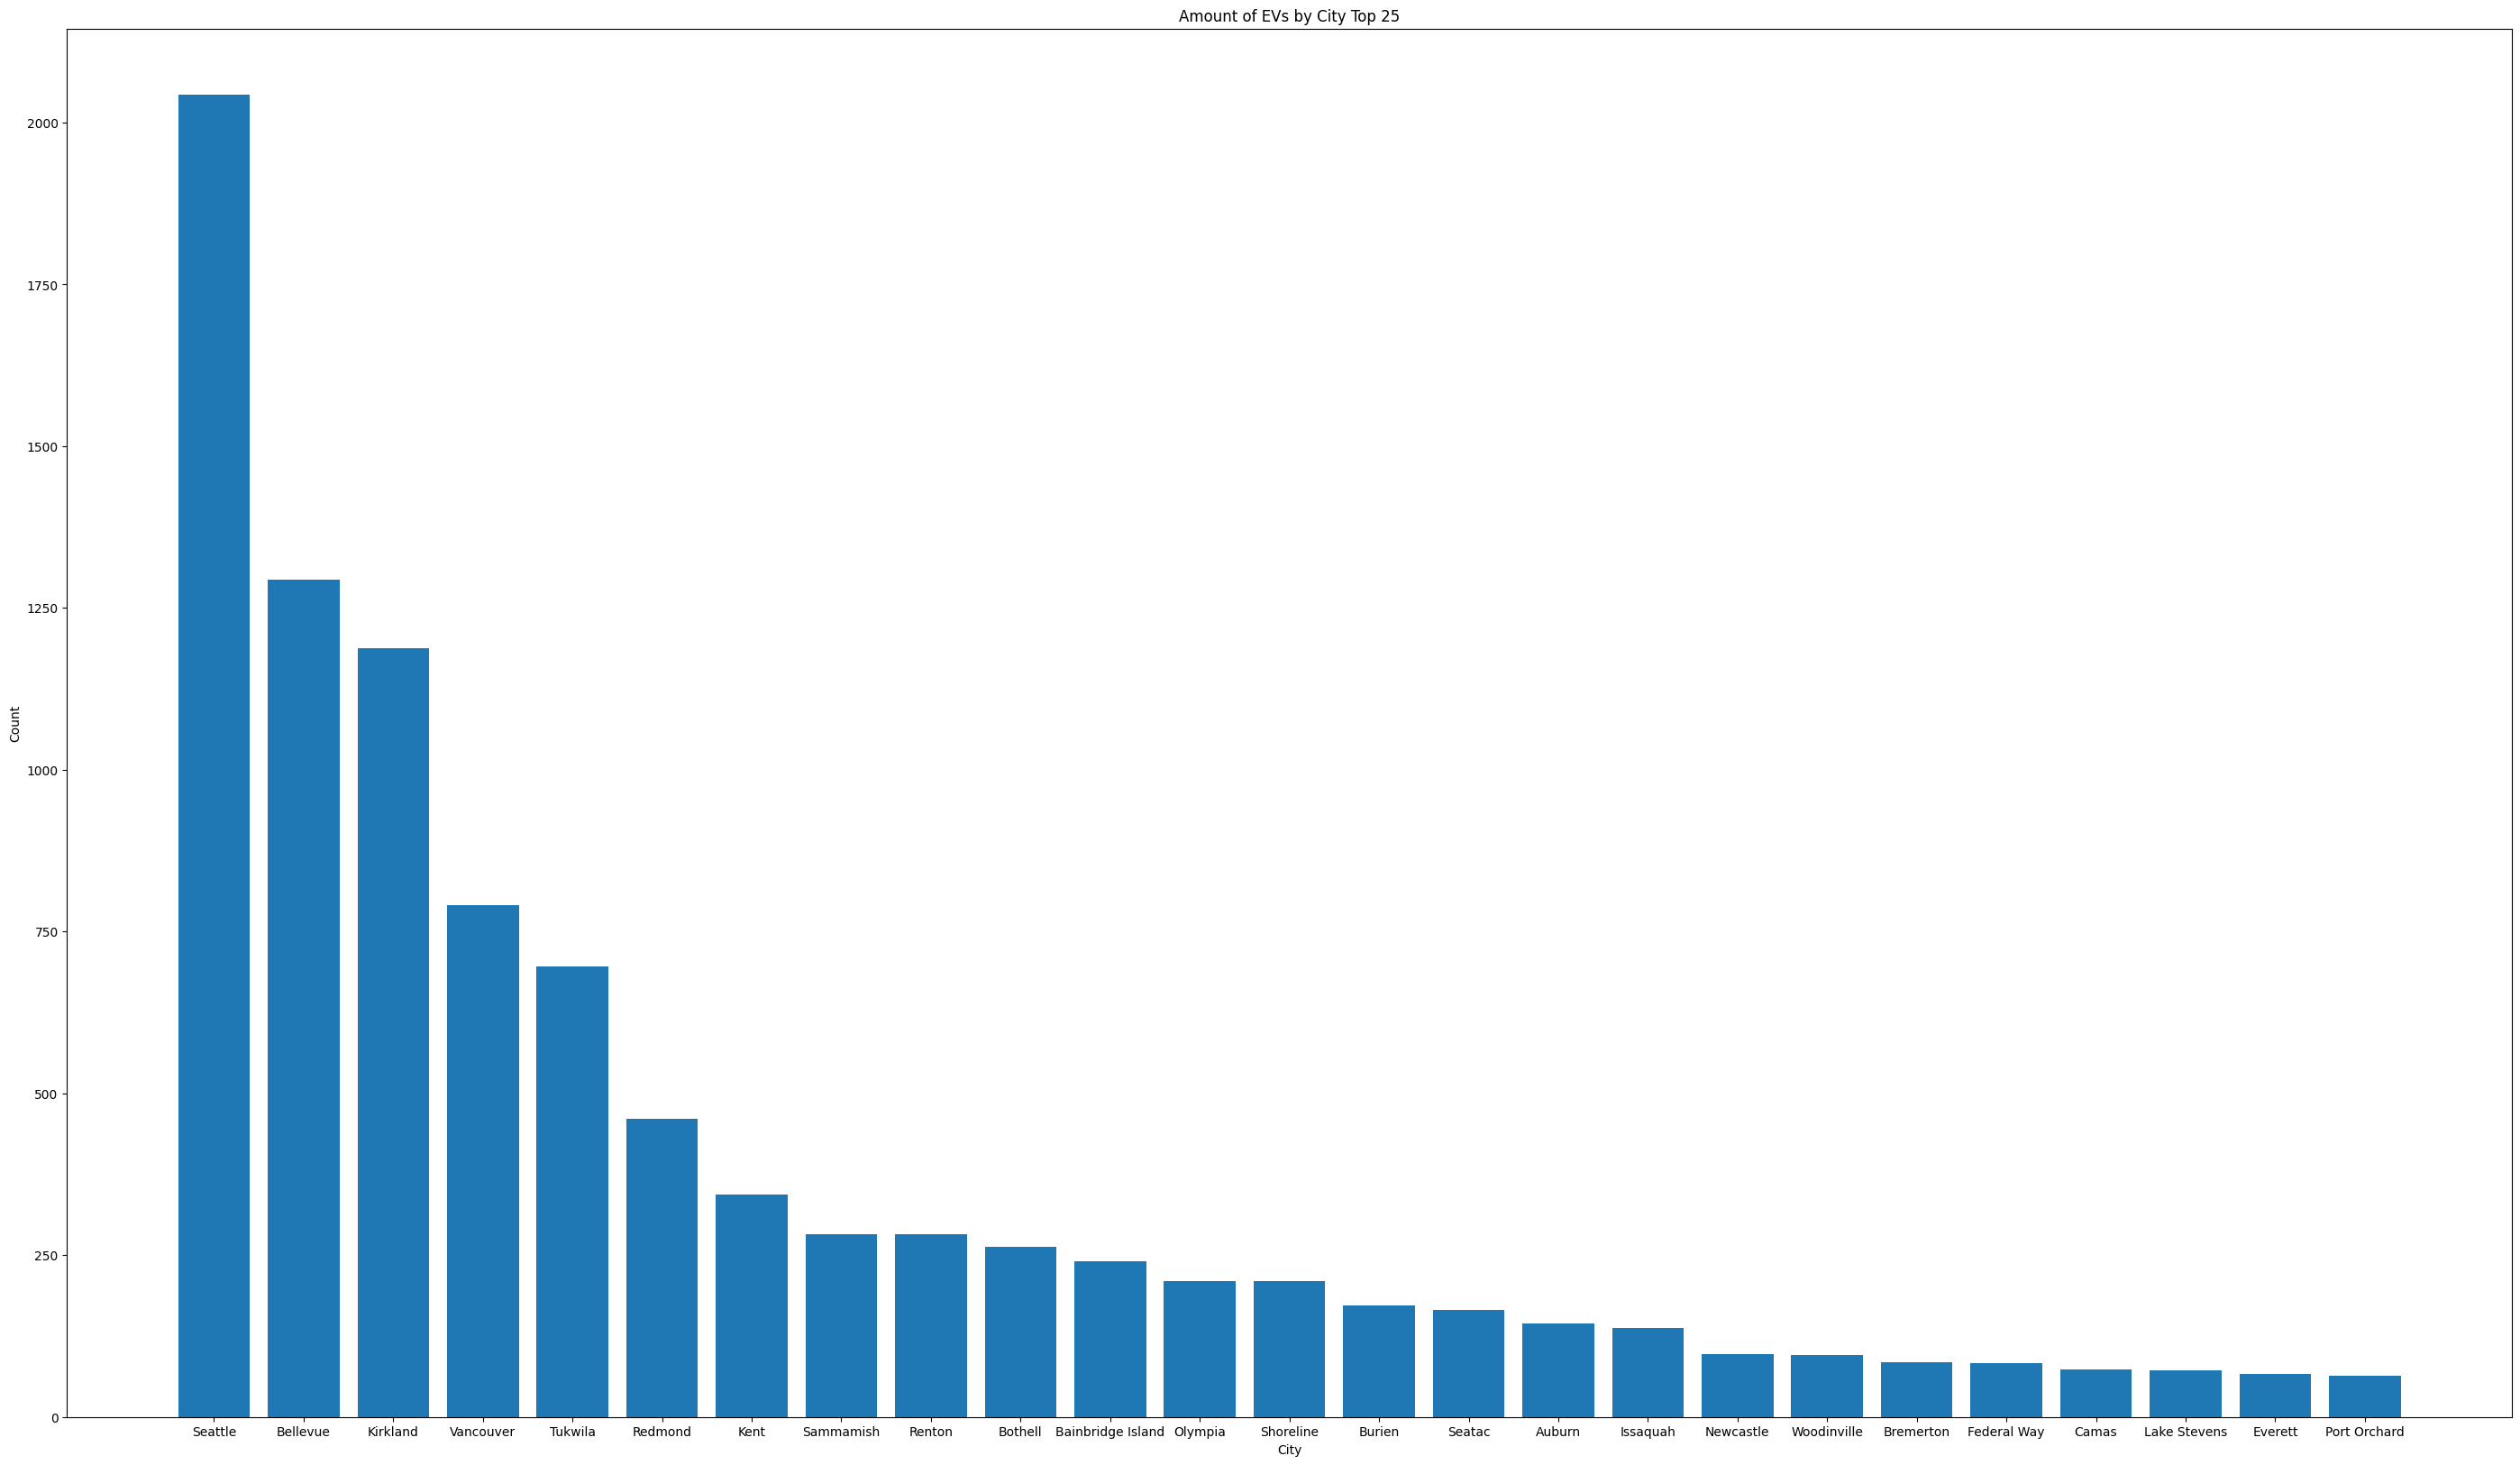

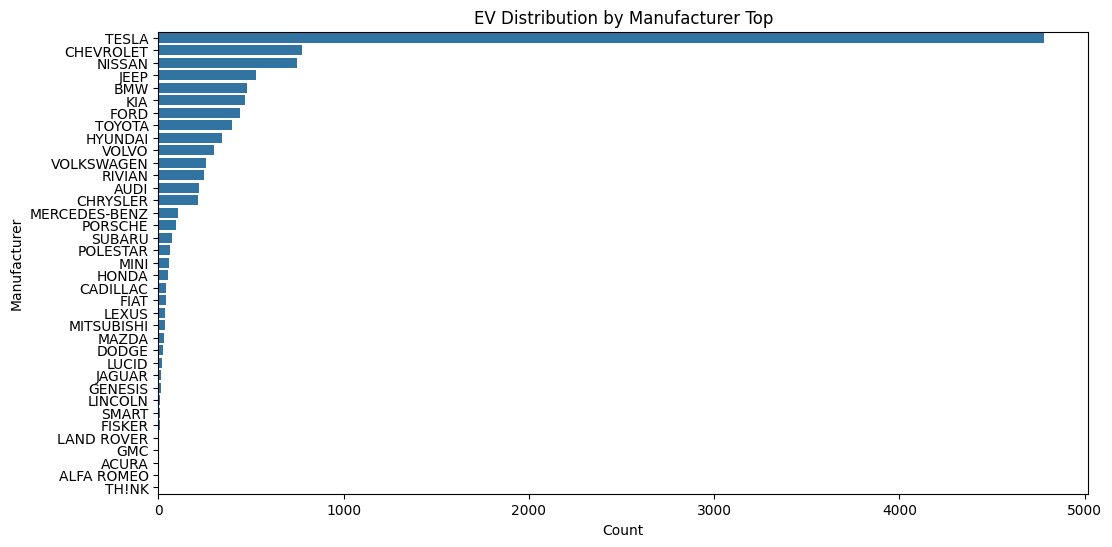

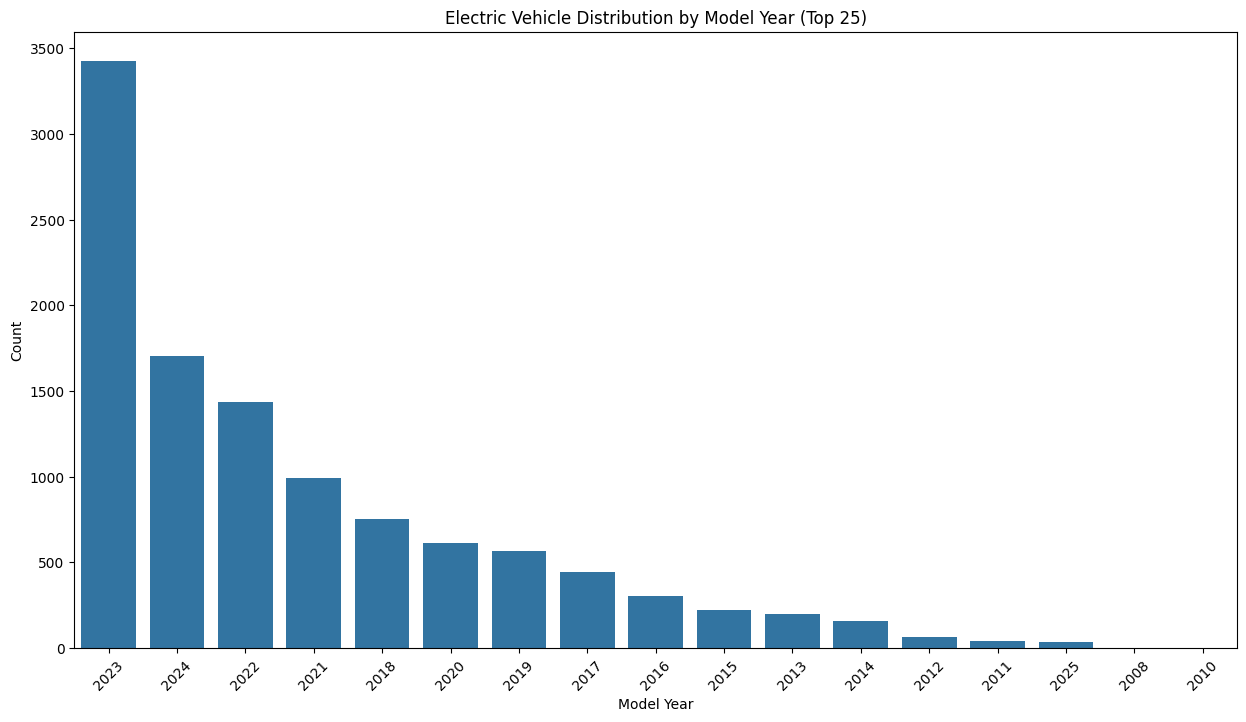

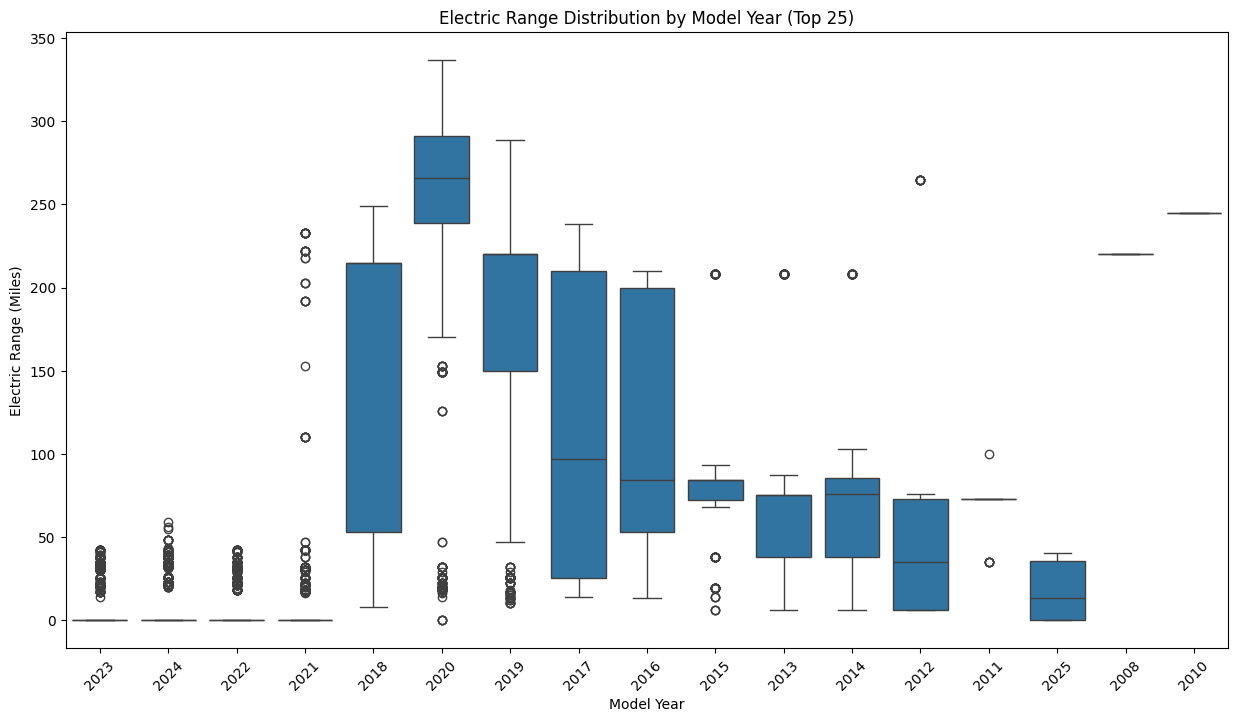

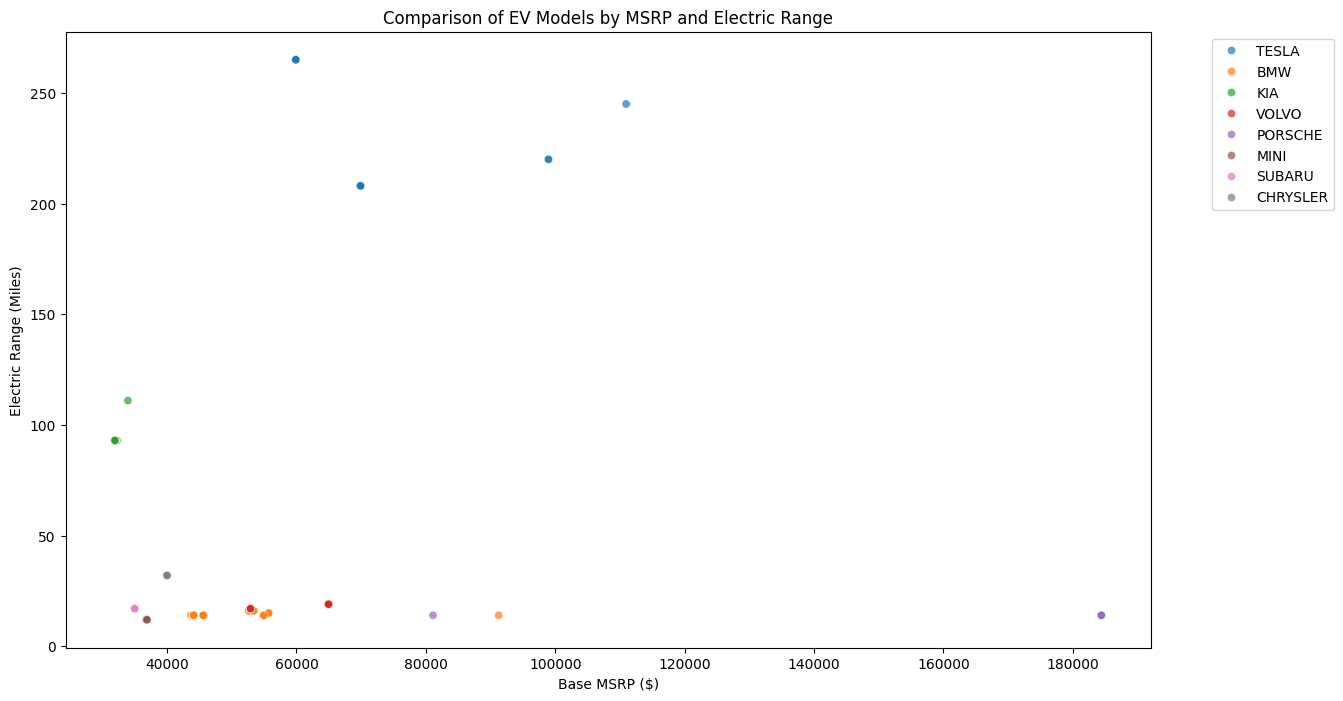

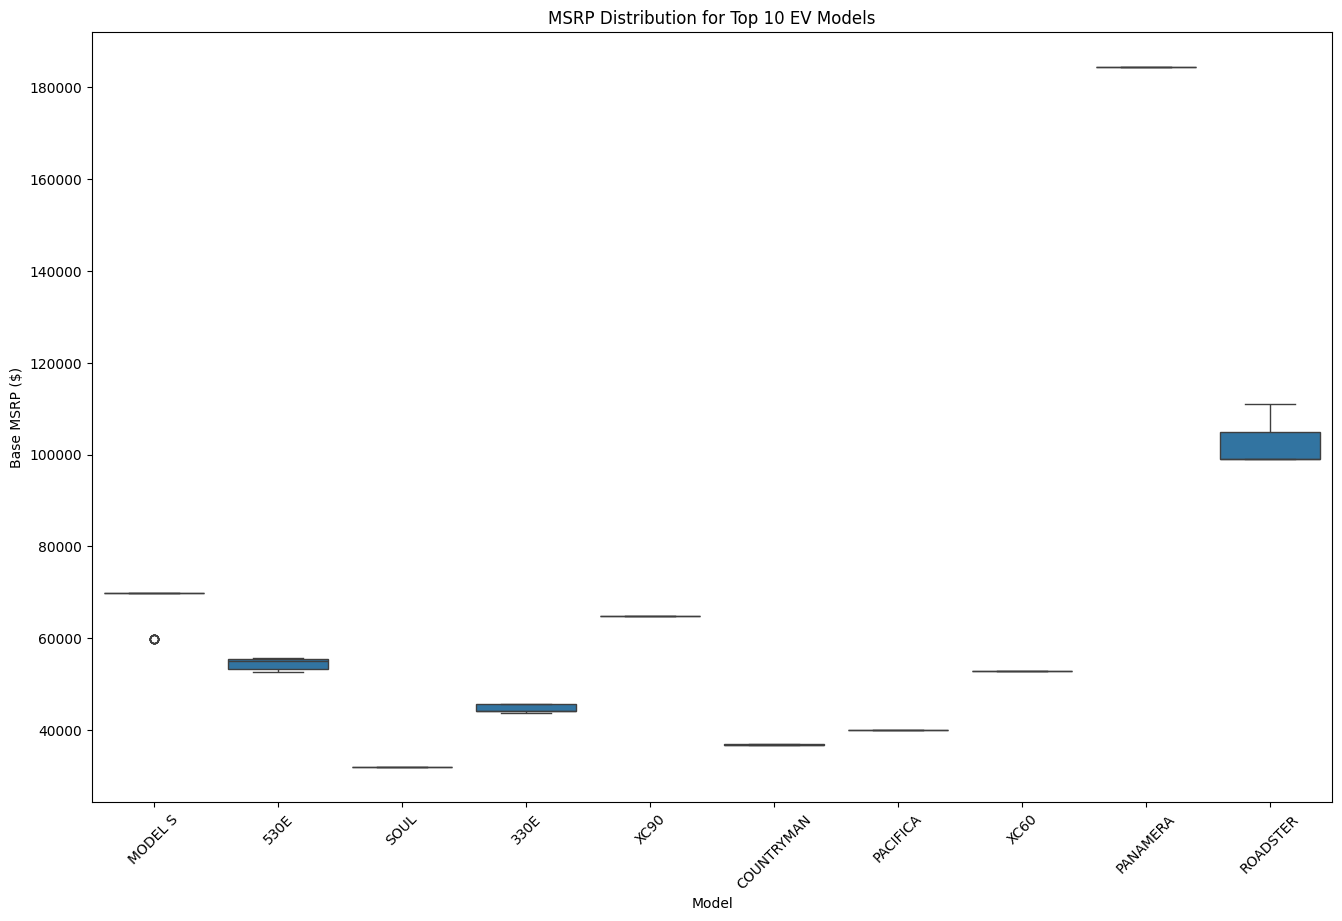

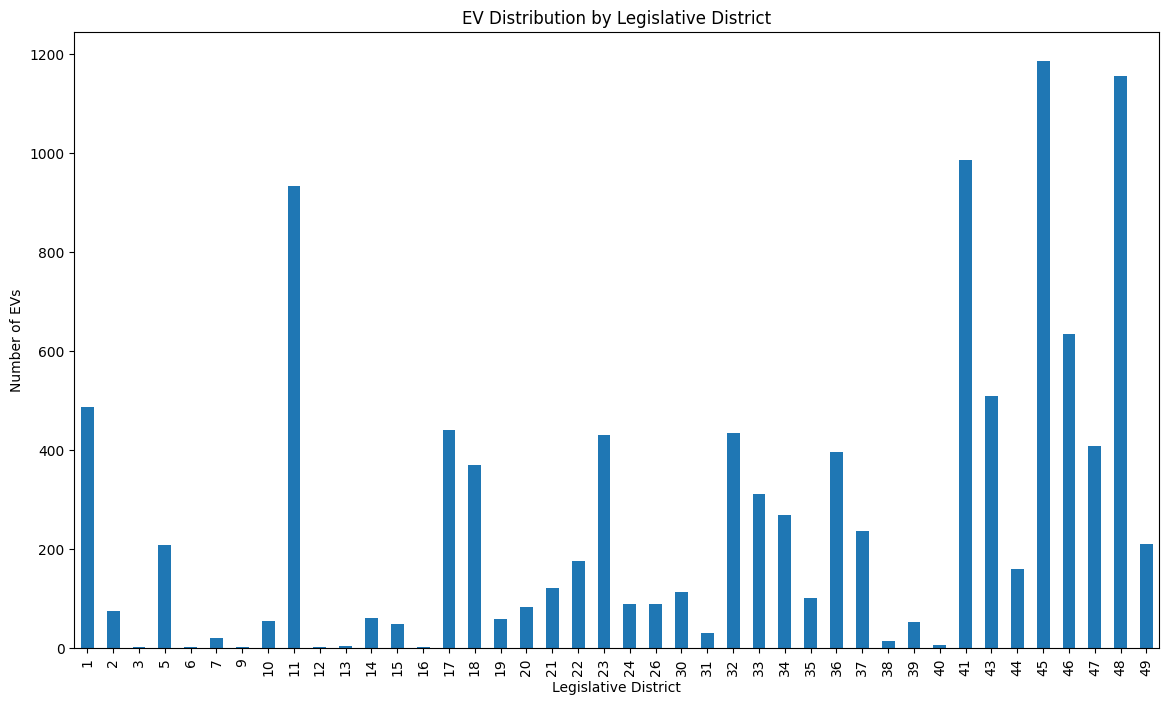

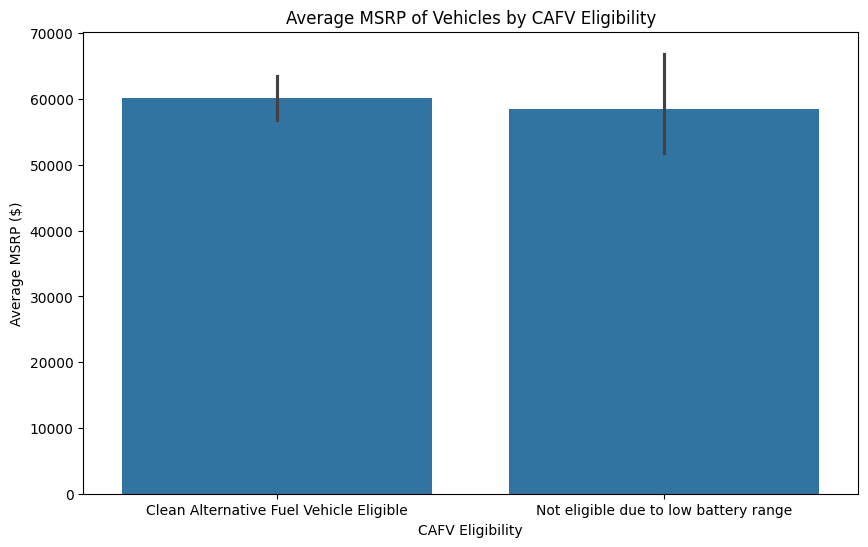

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import plotly.express as px
wr.filterwarnings('ignore')

ev = pd.read_csv('/content/Electric_Vehicle_Population_Data - Electric_Vehicle_Population_Data.csv')


print(ev.head())
ev.shape
ev.info()
ev.columns.tolist()
ev.nunique()


amount_of_EVs = ev['County'].value_counts().head(10)
plt.figure(figsize= (20,10))
plt.bar(amount_of_EVs.index, amount_of_EVs)
plt.title('Amount of EVs by County Top 10')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


amount_of_EVs_by_city = ev['City'].value_counts().head(25)
plt.figure(figsize = (35, 20))
plt.bar(amount_of_EVs_by_city.index, amount_of_EVs_by_city)
plt.title('Amount of EVs by City Top 25')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=ev['Make'], order=ev['Make'].value_counts().index)
plt.title('EV Distribution by Manufacturer Top')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

county_counts = ev['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']

fig = px.choropleth(county_counts,
                    geojson="path_to_geojson_file",
                    locations='County',
                    color='Count',
                    featureidkey="properties.COUNTY_NAME")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()



#Miles's part follows

# Filter the dataset to get the top 25 most frequent model years
top_model_years = ev['Model Year'].value_counts().head(25).index
ev_top_model_years = ev[ev['Model Year'].isin(top_model_years)]

# Plotting the distribution of EVs by Model Year for the top 25 years
plt.figure(figsize=(15, 8))
sns.countplot(x='Model Year', data=ev_top_model_years, order=top_model_years)
plt.title('Electric Vehicle Distribution by Model Year (Top 25)')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting Electric Range distribution for the top 25 Model Years
plt.figure(figsize=(15, 8))
sns.boxplot(x='Model Year', y='Electric Range', data=ev_top_model_years, order=top_model_years)
plt.title('Electric Range Distribution by Model Year (Top 25)')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (Miles)')
plt.xticks(rotation=45)
plt.show()

# Filter out rows with zero or missing MSRP or Electric Range values to focus on valid data
ev_filtered = ev[(ev['Base MSRP'] > 0) & (ev['Electric Range'] > 0)]

# Scatter plot to show MSRP vs. Electric Range for each model
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Base MSRP', y='Electric Range', hue='Make', data=ev_filtered, alpha=0.7)
plt.title('Comparison of EV Models by MSRP and Electric Range')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (Miles)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box plot of MSRP distribution by Model
plt.figure(figsize=(16, 10))
top_models = ev_filtered['Model'].value_counts().head(10).index  # Top 10 most common models
ev_top_models = ev_filtered[ev_filtered['Model'].isin(top_models)]
sns.boxplot(x='Model', y='Base MSRP', data=ev_top_models)
plt.title('MSRP Distribution for Top 10 EV Models')
plt.xlabel('Model')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=45)
plt.show()


# Group the data by Legislative District to count the number of EVs in each district
ev_by_legislative_district = ev['Legislative District'].value_counts().sort_index()

# Plotting a bar chart to show EV distribution across legislative districts
plt.figure(figsize=(14, 8))
ev_by_legislative_district.plot(kind='bar')
plt.title('EV Distribution by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Number of EVs')
plt.xticks(rotation=90)
plt.show()

# Extract latitude and longitude from the 'Vehicle Location' column
# Assuming coordinates are in the format "POINT (longitude latitude)"
ev[['Longitude', 'Latitude']] = ev['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

# Drop rows with missing coordinates
ev_map_data = ev.dropna(subset=['Longitude', 'Latitude'])

# Create a scatter map plot for geographic distribution with smaller size
fig = px.scatter_mapbox(
    ev_map_data,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    hover_data={"Make": True, "Model": True, "Electric Range": True},
    color_discrete_sequence=["blue"],
    zoom=5,
    height=400,  # Reduced height for a smaller display
    title="Geographic Distribution of Electric Vehicles"
)

# Set mapbox style
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()


# Filter out rows with missing or zero MSRP values
ev_price_eligibility = ev[ev['Base MSRP'] > 0]

# Creating a bar plot to compare MSRP of eligible vs. non-eligible vehicles
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    y='Base MSRP',
    data=ev_price_eligibility,
    estimator=lambda x: sum(x) / len(x)  # Average MSRP
)
plt.title('Average MSRP of Vehicles by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Average MSRP ($)')
plt.show()

#End of Miles's part

